In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs

init_printing()
init_vprinting()

theta, theta1, theta2, theta3, theta4, theta5 = symbols('theta theta_1 theta_2 theta_3 theta_4 theta_5', cls=Function)

theta_x, theta_y, theta_z, x_d, y_d, z_d, t = symbols('theta_x theta_y theta_z x_d y_d z_d, t')

theta1_dot, theta2_dot, theta3_dot, theta4_dot, theta5_dot = symbols('thetadot1 thetadot2 thetadot3 thetadot4 thetadot5', cls=Function)

Simplified H05:


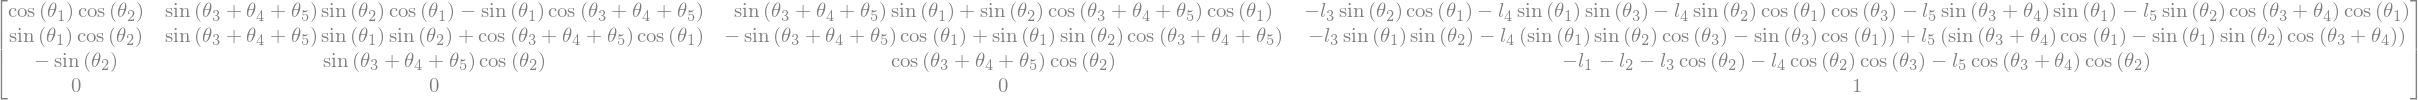

In [2]:
#Base frame is the same as hip axis 3, only hip axis 3 rotates around Z axis.

#IMPORTANT: signs for l could be swapped here, so either exclude them and adjust later when substituting
#           or change below.

l1, l2, l3, l4, l5, l6 = symbols('l_1 l_2 l_3 l_4 l_5 l_6')
#l1: From base to hip 3 = 0
#l2: From hip 3 to hip 2 = 0.145
#l3: From hip 2 to hip 1 = 0.145
#l4: From hip 1 to knee = 0.41
#l5: From Knee to ankle = 0.375
#l6: From ankle joint to foot base = 0.04

#Transformation from Base frame to Hip axis 3

H01_simple = Matrix([[cos(theta1(t)), -sin(theta1(t)), 0, 0],
                     [sin(theta1(t)), cos(theta1(t)), 0, 0],
                     [0, 0, 1, -l1], #l1 should be 0 here because base frame is in Hip axis 3 frame, just with no rotation
                     [0, 0, 0, 1]])

#Transformation from Hip axis 3 to Hip axis 2

H12_simple = Matrix([[cos(theta2(t)), 0, sin(theta2(t)), 0],
                     [0, 1, 0, 0],
                     [-sin(theta2(t)), 0, cos(theta2(t)), -l2],
                     [0, 0, 0, 1]])

#Transformation from Hip axis 2 to Hip axis 1

H23_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta3(t)), -sin(theta3(t)), 0],
                     [0, sin(theta3(t)), cos(theta3(t)), -l3],
                     [0, 0, 0, 1]])

#Transformation from Hip axis 1 to Knee

H34_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta4(t)), -sin(theta4(t)), 0],
                     [0, sin(theta4(t)), cos(theta4(t)), -l4],
                     [0, 0, 0, 1]])

#Tranformation from Knee to Ankle

H45_simple = Matrix([[1, 0, 0, 0],
                     [0, cos(theta5(t)), -sin(theta5(t)), 0],
                     [0, sin(theta5(t)), cos(theta5(t)), -l5],
                     [0, 0, 0, 1]])

H02_simple = H01_simple * H12_simple
H03_simple = H02_simple * H23_simple
H04_simple = H03_simple * H34_simple

H05_simple = H04_simple * H45_simple
print("Simplified H05:")
simplify(H05_simple)

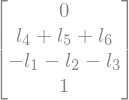

In [3]:
#, l1:0, l2:0.145, l3:0.145, l4:0.41, l5:0.375
H05_simple_subs = H05_simple.subs({theta1(t):0, theta2(t):0, theta3(t):pi/2, theta4(t):0, theta5(t):0})
H05_simple_subs * Matrix([0, 0, -l6, 1])

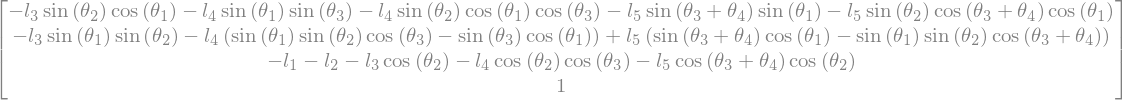

In [4]:
simplify(H05_simple * Matrix([0, 0, 0, 1]))

Simplified H05_com:


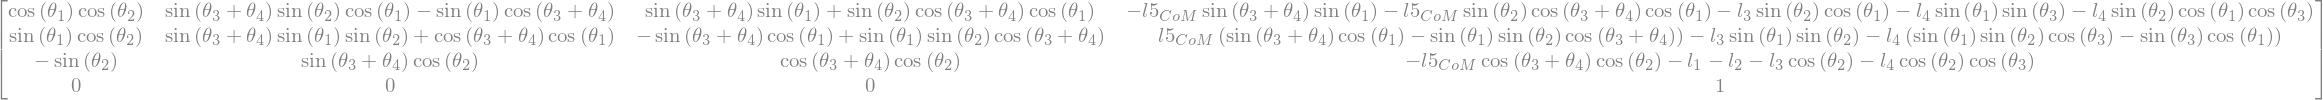

In [5]:
#Distance from previous frame to next frame. Frames are placed at CoM in this scenario.
l1_com, l2_com, l3_com, l4_com, l5_com, l6_com = symbols("l1_{CoM} l2_{CoM} l3_{CoM} l4_{CoM} l5_{CoM} l6_{CoM}")

H01_com = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, -l1_com],
                  [0, 0, 0, 1]])

H12_com = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, -l2_com],
                  [0, 0, 0, 1]])

H23_com = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, -l3_com],
                  [0, 0, 0, 1]])

H34_com = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, -l4_com],
                  [0, 0, 0, 1]])

H45_com = Matrix([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, -l5_com],
                  [0, 0, 0, 1]])

H02_com = H01_simple * H12_com
H03_com = H02_simple * H23_com
H04_com = H03_simple * H34_com
H05_com = H04_simple * H45_com

print("Simplified H05_com:")
simplify(H05_com)

In [7]:
# The position vectors are merely the Z displacement as the frames get rotated by the joints directly.
# This requires a "p" vector for every position.

p_com_foot = Matrix([0, 0, -l6_com, 1])
p_foot = Matrix([0, 0, -l6, 1])

p = Matrix([0, 0, 0, 1])

# To get velocities, *always* use x_dot = J * q_dot , where J is the Jacobian for the link!

hip_axis_3_com_pos = simplify(H01_com * p)

hip_axis_2_com_pos = simplify(H02_com * p)

hip_axis_1_com_pos = simplify(H03_com * p)

upper_leg_com_pos = simplify(H04_com * p)

lower_leg_com_pos = simplify(H05_com * p)

#Should I use H05_simple or H05_com here?
foot_com_pos = simplify(H05_simple * p_com_foot)

hip_axis_2_angular_vel = Matrix([0, 0, theta1(t)])
hip_axis_1_angular_vel = Matrix([0, theta2(t), theta1(t)])
upper_leg_angular_vel = Matrix([theta3(t), theta2(t), theta1(t)])
lower_leg_angular_vel = Matrix([theta3(t) + theta4(t), theta2(t), theta1(t)])
foot_angular_vel = Matrix([theta3(t) + theta4(t) + theta5(t), theta2(t), theta1(t)])

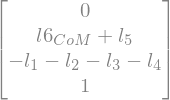

In [65]:
foot_com_pos.subs({theta1(t):0, theta2(t):0, theta3(t):0, theta4(t):pi/2, theta5(t):0})

In [9]:
m_hip_axis_3, m_hip_axis_2, m_hip_axis_1, m_upper_leg, m_lower_leg, m_foot = symbols('m_{hip3} m_{hip2} m_{hip1} m_{ul} m_{ll} m_{foot}')

#Use -9.81 even though vector also has -g !!!!
g = symbols('g')

In [10]:
tau_1, tau_2, tau_3, tau_4, tau_5 = symbols('tau_1 tau_2 tau_3 tau_4 tau_5',cls=Function)

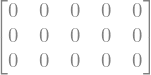

In [11]:
J_p_com_hip_axis_2 = Matrix([[simplify(diff(hip_axis_2_com_pos.row(0), theta1(t))), simplify(diff(hip_axis_2_com_pos.row(0), theta2(t))), simplify(diff(hip_axis_2_com_pos.row(0), theta3(t))), simplify(diff(hip_axis_2_com_pos.row(0), theta4(t))), simplify(diff(hip_axis_2_com_pos.row(0), theta5(t)))],
                             [simplify(diff(hip_axis_2_com_pos.row(1), theta1(t))), simplify(diff(hip_axis_2_com_pos.row(1), theta2(t))), simplify(diff(hip_axis_2_com_pos.row(1), theta3(t))), simplify(diff(hip_axis_2_com_pos.row(1), theta4(t))), simplify(diff(hip_axis_2_com_pos.row(1), theta5(t)))],
                             [simplify(diff(hip_axis_2_com_pos.row(2), theta1(t))), simplify(diff(hip_axis_2_com_pos.row(2), theta2(t))), simplify(diff(hip_axis_2_com_pos.row(2), theta3(t))), simplify(diff(hip_axis_2_com_pos.row(2), theta5(t))), simplify(diff(hip_axis_2_com_pos.row(2), theta5(t)))]])
J_p_com_hip_axis_2

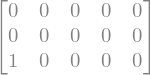

In [12]:
J_o_com_hip_axis_2 = Matrix([[simplify(diff(hip_axis_2_angular_vel.row(0), theta1(t))), simplify(diff(hip_axis_2_angular_vel.row(0), theta2(t))), simplify(diff(hip_axis_2_angular_vel.row(0), theta3(t))), simplify(diff(hip_axis_2_angular_vel.row(0), theta4(t))), simplify(diff(hip_axis_2_angular_vel.row(0), theta5(t)))],
                             [simplify(diff(hip_axis_2_angular_vel.row(1), theta1(t))), simplify(diff(hip_axis_2_angular_vel.row(1), theta2(t))), simplify(diff(hip_axis_2_angular_vel.row(1), theta3(t))), simplify(diff(hip_axis_2_angular_vel.row(1), theta4(t))), simplify(diff(hip_axis_2_angular_vel.row(1), theta5(t)))],
                             [simplify(diff(hip_axis_2_angular_vel.row(2), theta1(t))), simplify(diff(hip_axis_2_angular_vel.row(2), theta2(t))), simplify(diff(hip_axis_2_angular_vel.row(2), theta3(t))), simplify(diff(hip_axis_2_angular_vel.row(2), theta4(t))), simplify(diff(hip_axis_2_angular_vel.row(2), theta5(t)))]])
J_o_com_hip_axis_2

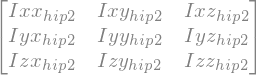

In [13]:
I_hip_axis_2_xx, I_hip_axis_2_xy, I_hip_axis_2_xz = symbols("Ixx_{hip2} Ixy_{hip2} Ixz_{hip2}")
I_hip_axis_2_yx, I_hip_axis_2_yy, I_hip_axis_2_yz = symbols("Iyx_{hip2} Iyy_{hip2} Iyz_{hip2}")
I_hip_axis_2_zx, I_hip_axis_2_zy, I_hip_axis_2_zz = symbols("Izx_{hip2} Izy_{hip2} Izz_{hip2}")

I_hip_axis_2 = Matrix([[I_hip_axis_2_xx, I_hip_axis_2_xy, I_hip_axis_2_xz],
                       [I_hip_axis_2_yx, I_hip_axis_2_yy, I_hip_axis_2_yz],
                       [I_hip_axis_2_zx, I_hip_axis_2_zy, I_hip_axis_2_zz]])
I_hip_axis_2

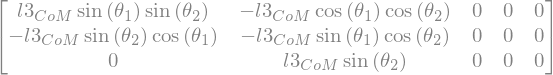

In [14]:
J_p_com_hip_axis_1 = Matrix([[simplify(diff(hip_axis_1_com_pos.row(0), theta1(t))), simplify(diff(hip_axis_1_com_pos.row(0), theta2(t))), simplify(diff(hip_axis_1_com_pos.row(0), theta3(t))), simplify(diff(hip_axis_1_com_pos.row(0), theta4(t))), simplify(diff(hip_axis_1_com_pos.row(0), theta5(t)))],
                             [simplify(diff(hip_axis_1_com_pos.row(1), theta1(t))), simplify(diff(hip_axis_1_com_pos.row(1), theta2(t))), simplify(diff(hip_axis_1_com_pos.row(1), theta3(t))), simplify(diff(hip_axis_1_com_pos.row(1), theta4(t))), simplify(diff(hip_axis_1_com_pos.row(1), theta5(t)))],
                             [simplify(diff(hip_axis_1_com_pos.row(2), theta1(t))), simplify(diff(hip_axis_1_com_pos.row(2), theta2(t))), simplify(diff(hip_axis_1_com_pos.row(2), theta3(t))), simplify(diff(hip_axis_1_com_pos.row(2), theta4(t))), simplify(diff(hip_axis_1_com_pos.row(2), theta5(t)))]])
J_p_com_hip_axis_1

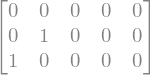

In [15]:
J_o_com_hip_axis_1 = Matrix([[simplify(diff(hip_axis_1_angular_vel.row(0), theta1(t))), simplify(diff(hip_axis_1_angular_vel.row(0), theta2(t))), simplify(diff(hip_axis_1_angular_vel.row(0), theta3(t))), simplify(diff(hip_axis_1_angular_vel.row(0), theta4(t))), simplify(diff(hip_axis_1_angular_vel.row(0), theta5(t)))],
                             [simplify(diff(hip_axis_1_angular_vel.row(1), theta1(t))), simplify(diff(hip_axis_1_angular_vel.row(1), theta2(t))), simplify(diff(hip_axis_1_angular_vel.row(1), theta3(t))), simplify(diff(hip_axis_1_angular_vel.row(1), theta4(t))), simplify(diff(hip_axis_1_angular_vel.row(1), theta5(t)))],
                             [simplify(diff(hip_axis_1_angular_vel.row(2), theta1(t))), simplify(diff(hip_axis_1_angular_vel.row(2), theta2(t))), simplify(diff(hip_axis_1_angular_vel.row(2), theta3(t))), simplify(diff(hip_axis_1_angular_vel.row(2), theta4(t))), simplify(diff(hip_axis_1_angular_vel.row(2), theta5(t)))]])
J_o_com_hip_axis_1

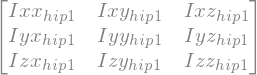

In [16]:
I_hip_axis_1_xx, I_hip_axis_1_xy, I_hip_axis_1_xz = symbols("Ixx_{hip1} Ixy_{hip1} Ixz_{hip1}")
I_hip_axis_1_yx, I_hip_axis_1_yy, I_hip_axis_1_yz = symbols("Iyx_{hip1} Iyy_{hip1} Iyz_{hip1}")
I_hip_axis_1_zx, I_hip_axis_1_zy, I_hip_axis_1_zz = symbols("Izx_{hip1} Izy_{hip1} Izz_{hip1}")

I_hip_axis_1 = Matrix([[I_hip_axis_1_xx, I_hip_axis_1_xy, I_hip_axis_1_xz],
                       [I_hip_axis_1_yx, I_hip_axis_1_yy, I_hip_axis_1_yz],
                       [I_hip_axis_1_zx, I_hip_axis_1_zy, I_hip_axis_1_zz]])
I_hip_axis_1

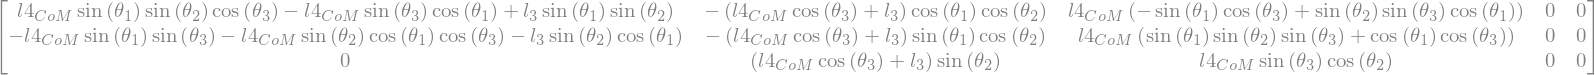

In [17]:
J_p_com_upper_leg = Matrix([[simplify(diff(upper_leg_com_pos.row(0), theta1(t))), simplify(diff(upper_leg_com_pos.row(0), theta2(t))), simplify(diff(upper_leg_com_pos.row(0), theta3(t))), simplify(diff(upper_leg_com_pos.row(0), theta4(t))), simplify(diff(upper_leg_com_pos.row(0), theta5(t)))],
                            [simplify(diff(upper_leg_com_pos.row(1), theta1(t))), simplify(diff(upper_leg_com_pos.row(1), theta2(t))), simplify(diff(upper_leg_com_pos.row(1), theta3(t))), simplify(diff(upper_leg_com_pos.row(1), theta4(t))), simplify(diff(upper_leg_com_pos.row(1), theta5(t)))],
                            [simplify(diff(upper_leg_com_pos.row(2), theta1(t))), simplify(diff(upper_leg_com_pos.row(2), theta2(t))), simplify(diff(upper_leg_com_pos.row(2), theta3(t))), simplify(diff(upper_leg_com_pos.row(2), theta4(t))), simplify(diff(upper_leg_com_pos.row(2), theta5(t)))]])
J_p_com_upper_leg

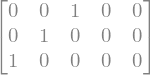

In [18]:
J_o_com_upper_leg = Matrix([[simplify(diff(upper_leg_angular_vel.row(0), theta1(t))), simplify(diff(upper_leg_angular_vel.row(0), theta2(t))), simplify(diff(upper_leg_angular_vel.row(0), theta3(t))), simplify(diff(upper_leg_angular_vel.row(0), theta4(t))), simplify(diff(upper_leg_angular_vel.row(0), theta5(t)))],
                            [simplify(diff(upper_leg_angular_vel.row(1), theta1(t))), simplify(diff(upper_leg_angular_vel.row(1), theta2(t))), simplify(diff(upper_leg_angular_vel.row(1), theta3(t))), simplify(diff(upper_leg_angular_vel.row(1), theta4(t))), simplify(diff(upper_leg_angular_vel.row(1), theta5(t)))],
                            [simplify(diff(upper_leg_angular_vel.row(2), theta1(t))), simplify(diff(upper_leg_angular_vel.row(2), theta2(t))), simplify(diff(upper_leg_angular_vel.row(2), theta3(t))), simplify(diff(upper_leg_angular_vel.row(2), theta4(t))), simplify(diff(upper_leg_angular_vel.row(2), theta5(t)))]])
J_o_com_upper_leg

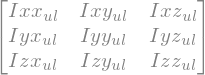

In [19]:
I_upper_leg_xx, I_upper_leg_xy, I_upper_leg_xz = symbols("Ixx_{ul} Ixy_{ul} Ixz_{ul}")
I_upper_leg_yx, I_upper_leg_yy, I_upper_leg_yz = symbols("Iyx_{ul} Iyy_{ul} Iyz_{ul}")
I_upper_leg_zx, I_upper_leg_zy, I_upper_leg_zz = symbols("Izx_{ul} Izy_{ul} Izz_{ul}")

I_upper_leg = Matrix([[I_upper_leg_xx, I_upper_leg_xy, I_upper_leg_xz],
                      [I_upper_leg_yx, I_upper_leg_yy, I_upper_leg_yz],
                      [I_upper_leg_zx, I_upper_leg_zy, I_upper_leg_zz]])
I_upper_leg

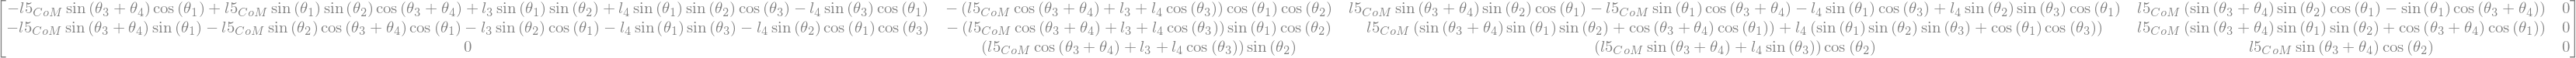

In [20]:
J_p_com_lower_leg = Matrix([[simplify(diff(lower_leg_com_pos.row(0), theta1(t))), simplify(diff(lower_leg_com_pos.row(0), theta2(t))), simplify(diff(lower_leg_com_pos.row(0), theta3(t))), simplify(diff(lower_leg_com_pos.row(0), theta4(t))), simplify(diff(lower_leg_com_pos.row(0), theta5(t)))],
                            [simplify(diff(lower_leg_com_pos.row(1), theta1(t))), simplify(diff(lower_leg_com_pos.row(1), theta2(t))), simplify(diff(lower_leg_com_pos.row(1), theta3(t))), simplify(diff(lower_leg_com_pos.row(1), theta4(t))), simplify(diff(lower_leg_com_pos.row(1), theta5(t)))],
                            [simplify(diff(lower_leg_com_pos.row(2), theta1(t))), simplify(diff(lower_leg_com_pos.row(2), theta2(t))), simplify(diff(lower_leg_com_pos.row(2), theta3(t))), simplify(diff(lower_leg_com_pos.row(2), theta4(t))), simplify(diff(lower_leg_com_pos.row(2), theta5(t)))]])
J_p_com_lower_leg

Is this correct?


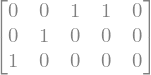

In [21]:
J_o_com_lower_leg = Matrix([[simplify(diff(lower_leg_angular_vel.row(0), theta1(t))), simplify(diff(lower_leg_angular_vel.row(0), theta2(t))), simplify(diff(lower_leg_angular_vel.row(0), theta3(t))), simplify(diff(lower_leg_angular_vel.row(0), theta4(t))), simplify(diff(lower_leg_angular_vel.row(0), theta5(t)))],
                            [simplify(diff(lower_leg_angular_vel.row(1), theta1(t))), simplify(diff(lower_leg_angular_vel.row(1), theta2(t))), simplify(diff(lower_leg_angular_vel.row(1), theta3(t))), simplify(diff(lower_leg_angular_vel.row(1), theta4(t))), simplify(diff(lower_leg_angular_vel.row(1), theta5(t)))],
                            [simplify(diff(lower_leg_angular_vel.row(2), theta1(t))), simplify(diff(lower_leg_angular_vel.row(2), theta2(t))), simplify(diff(lower_leg_angular_vel.row(2), theta3(t))), simplify(diff(lower_leg_angular_vel.row(2), theta4(t))), simplify(diff(lower_leg_angular_vel.row(2), theta5(t)))]])
print("Is this correct?")
J_o_com_lower_leg

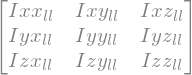

In [22]:
I_lower_leg_xx, I_lower_leg_xy, I_lower_leg_xz = symbols("Ixx_{ll} Ixy_{ll} Ixz_{ll}")
I_lower_leg_yx, I_lower_leg_yy, I_lower_leg_yz = symbols("Iyx_{ll} Iyy_{ll} Iyz_{ll}")
I_lower_leg_zx, I_lower_leg_zy, I_lower_leg_zz = symbols("Izx_{ll} Izy_{ll} Izz_{ll}")

I_lower_leg = Matrix([[I_lower_leg_xx, I_lower_leg_xy, I_lower_leg_xz],
                      [I_lower_leg_yx, I_lower_leg_yy, I_lower_leg_yz],
                      [I_lower_leg_zx, I_lower_leg_zy, I_lower_leg_zz]])
I_lower_leg

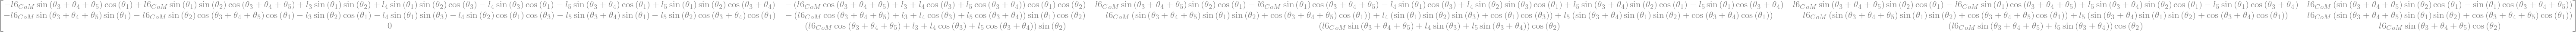

In [23]:
J_p_com_foot = Matrix([[simplify(diff(foot_com_pos.row(0), theta1(t))), simplify(diff(foot_com_pos.row(0), theta2(t))), simplify(diff(foot_com_pos.row(0), theta3(t))), simplify(diff(foot_com_pos.row(0), theta4(t))), simplify(diff(foot_com_pos.row(0), theta5(t)))],
                       [simplify(diff(foot_com_pos.row(1), theta1(t))), simplify(diff(foot_com_pos.row(1), theta2(t))), simplify(diff(foot_com_pos.row(1), theta3(t))), simplify(diff(foot_com_pos.row(1), theta4(t))), simplify(diff(foot_com_pos.row(1), theta5(t)))],
                       [simplify(diff(foot_com_pos.row(2), theta1(t))), simplify(diff(foot_com_pos.row(2), theta2(t))), simplify(diff(foot_com_pos.row(2), theta3(t))), simplify(diff(foot_com_pos.row(2), theta4(t))), simplify(diff(foot_com_pos.row(2), theta5(t)))]])
J_p_com_foot

Is this correct?


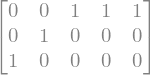

In [24]:
J_o_com_foot = Matrix([[simplify(diff(foot_angular_vel.row(0), theta1(t))), simplify(diff(foot_angular_vel.row(0), theta2(t))), simplify(diff(foot_angular_vel.row(0), theta3(t))), simplify(diff(foot_angular_vel.row(0), theta4(t))), simplify(diff(foot_angular_vel.row(0), theta5(t)))],
                       [simplify(diff(foot_angular_vel.row(1), theta1(t))), simplify(diff(foot_angular_vel.row(1), theta2(t))), simplify(diff(foot_angular_vel.row(1), theta3(t))), simplify(diff(foot_angular_vel.row(1), theta4(t))), simplify(diff(foot_angular_vel.row(1), theta5(t)))],
                       [simplify(diff(foot_angular_vel.row(2), theta1(t))), simplify(diff(foot_angular_vel.row(2), theta2(t))), simplify(diff(foot_angular_vel.row(2), theta3(t))), simplify(diff(foot_angular_vel.row(2), theta4(t))), simplify(diff(foot_angular_vel.row(2), theta5(t)))]])
print("Is this correct?")
J_o_com_foot

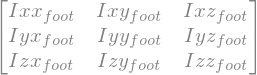

In [25]:
I_foot_xx, I_foot_xy, I_foot_xz = symbols("Ixx_{foot} Ixy_{foot} Ixz_{foot}")
I_foot_yx, I_foot_yy, I_foot_yz = symbols("Iyx_{foot} Iyy_{foot} Iyz_{foot}")
I_foot_zx, I_foot_zy, I_foot_zz = symbols("Izx_{foot} Izy_{foot} Izz_{foot}")

I_foot = Matrix([[I_foot_xx, I_foot_xy, I_foot_xz],
                 [I_foot_yx, I_foot_yy, I_foot_yz],
                 [I_foot_zx, I_foot_zy, I_foot_zz]])
I_foot

In [26]:
#Rotation from base frame to Ankle CoM frame

R05_com = Matrix([[H05_com.row(0)[0], H05_com.row(0)[1], H05_com.row(0)[2]],
                  [H05_com.row(1)[0], H05_com.row(1)[1], H05_com.row(1)[2]],
                  [H05_com.row(2)[0], H05_com.row(2)[1], H05_com.row(2)[2]]])

#Rotation form base frame to Knee CoM frame

R04_com = Matrix([[H04_com.row(0)[0], H04_com.row(0)[1], H04_com.row(0)[2]],
                  [H04_com.row(1)[0], H04_com.row(1)[1], H04_com.row(1)[2]],
                  [H04_com.row(2)[0], H04_com.row(2)[1], H04_com.row(2)[2]]])

#Rotation from base frame to Hip axis 1 CoM frame

R03_com = Matrix([[H03_com.row(0)[0], H03_com.row(0)[1], H03_com.row(0)[2]],
                  [H03_com.row(1)[0], H03_com.row(1)[1], H03_com.row(1)[2]],
                  [H03_com.row(2)[0], H03_com.row(2)[1], H03_com.row(2)[2]]])

#Rotation from base frame to Hip axis 2 CoM frame

R02_com = Matrix([[H02_com.row(0)[0], H02_com.row(0)[1], H02_com.row(0)[2]],
                  [H02_com.row(1)[0], H02_com.row(1)[1], H02_com.row(1)[2]],
                  [H02_com.row(2)[0], H02_com.row(2)[1], H02_com.row(2)[2]]])

#Rotation from base frame to Hip axis 3 CoM frame

R01_com =  Matrix([[H01_com.row(0)[0], H01_com.row(0)[1], H01_com.row(0)[2]],
                   [H01_com.row(1)[0], H01_com.row(1)[1], H01_com.row(1)[2]],
                   [H01_com.row(2)[0], H01_com.row(2)[1], H01_com.row(2)[2]]])

In [27]:
#B_hip_axis_3 = m_hip_axis_3 * J_p_com_hip_axis_3.T * J_p_com_hip_axis_3 + J_o_com_hip_axis_2.T * R01_com * I_hip_axis_3 * R01.T * J_o_com_hip_axis_3
B_hip_axis_2 = m_hip_axis_2 * J_p_com_hip_axis_2.T * J_p_com_hip_axis_2 + J_o_com_hip_axis_2.T * R01_com * I_hip_axis_2 * R01_com.T * J_o_com_hip_axis_2
B_hip_axis_1 = m_hip_axis_1 * J_p_com_hip_axis_1.T * J_p_com_hip_axis_1 + J_o_com_hip_axis_1.T * R02_com * I_hip_axis_1 * R02_com.T * J_o_com_hip_axis_1
B_upper_leg = m_upper_leg * J_p_com_upper_leg.T * J_p_com_upper_leg + J_o_com_upper_leg.T * R03_com * I_upper_leg * R03_com.T * J_o_com_upper_leg
B_lower_leg = m_lower_leg * J_p_com_lower_leg.T * J_p_com_lower_leg + J_o_com_lower_leg.T * R04_com * I_lower_leg * R04_com.T * J_o_com_lower_leg
B_foot = m_foot * J_p_com_foot.T * J_p_com_foot + J_o_com_foot.T * R05_com * I_foot * R05_com.T * J_o_com_foot

In [28]:
B = B_hip_axis_2 + B_hip_axis_1 + B_upper_leg + B_lower_leg + B_foot

In [29]:
#B_dot = simplify(diff(B, t))
B_dot = diff(B, t)
#B_dot = B.diff(t)J_p

In [30]:
q = Matrix([theta1(t), theta2(t), theta3(t), theta4(t), theta5(t)])
q_dot = Matrix([theta1_dot(t), theta2_dot(t), theta3_dot(t), theta4_dot(t), theta5_dot(t)])

In [31]:
b_q_dot_1 = diff(q_dot.T * B * q_dot, theta1(t))
print("Diff 1 done.")

Diff 1 done.


In [32]:
b_q_dot_2 = diff(q_dot.T * B * q_dot, theta2(t))
print("Diff 2 done.")

Diff 2 done.


In [33]:
b_q_dot_3 = diff(q_dot.T * B * q_dot, theta3(t))
print("Diff 3 done.")

Diff 3 done.


In [34]:
b_q_dot_4 = diff(q_dot.T * B * q_dot, theta4(t))
print("Diff 4 done.")

Diff 4 done.


In [35]:
b_q_dot_5 = diff(q_dot.T * B * q_dot, theta5(t))
print("Diff 5 done.")

Diff 5 done.


In [36]:
B_q_dot = Matrix([b_q_dot_1, b_q_dot_2, b_q_dot_3, b_q_dot_4, b_q_dot_5])
print("B_q_dot calculation done.")
print("B_q_dot shape:", B_q_dot.shape)
#B_q_dot = simplify(B_q_dot)
#print("B_q_dot simplification done.")
C = B_dot * q_dot - 0.5 * B_q_dot
C = C.subs({diff(theta1(t), t):theta1_dot(t), diff(theta2(t), t):theta2_dot(t), diff(theta3(t), t):theta3_dot(t), diff(theta4(t), t):theta4_dot(t), diff(theta5(t), t):theta5_dot(t)})
print("C calculation done.")

B_q_dot calculation done.
B_q_dot shape: (5, 1)
C calculation done.


In [37]:
g_vector = Matrix([0, 0, -g])

#g_1 means first column of Jacobian (to get theta1 component)

g_1 = -(m_hip_axis_2 * g_vector.T * J_p_com_hip_axis_2.col(0) + m_hip_axis_1 * g_vector.T * J_p_com_hip_axis_1.col(0) + m_upper_leg * g_vector.T * J_p_com_upper_leg.col(0) + m_lower_leg * g_vector.T * J_p_com_lower_leg.col(0) + m_foot * g_vector.T * J_p_com_foot.col(0))
g_1 = g_1[0]

g_2 = -(m_hip_axis_2 * g_vector.T * J_p_com_hip_axis_2.col(1) + m_hip_axis_1 * g_vector.T * J_p_com_hip_axis_1.col(1) + m_upper_leg * g_vector.T * J_p_com_upper_leg.col(1) + m_lower_leg * g_vector.T * J_p_com_lower_leg.col(1) + m_foot * g_vector.T * J_p_com_foot.col(1))
g_2 = g_2[0]

g_3 = -(m_hip_axis_2 * g_vector.T * J_p_com_hip_axis_2.col(2) + m_hip_axis_1 * g_vector.T * J_p_com_hip_axis_1.col(2) + m_upper_leg * g_vector.T * J_p_com_upper_leg.col(2) + m_lower_leg * g_vector.T * J_p_com_lower_leg.col(2) + m_foot * g_vector.T * J_p_com_foot.col(2))
g_3 = g_3[0]

g_4 = -(m_hip_axis_2 * g_vector.T * J_p_com_hip_axis_2.col(3) + m_hip_axis_1 * g_vector.T * J_p_com_hip_axis_1.col(3) + m_upper_leg * g_vector.T * J_p_com_upper_leg.col(3) + m_lower_leg * g_vector.T * J_p_com_lower_leg.col(3) + m_foot * g_vector.T * J_p_com_foot.col(3))
g_4 = g_4[0]

g_5 = -(m_hip_axis_2 * g_vector.T * J_p_com_hip_axis_2.col(4) + m_hip_axis_1 * g_vector.T * J_p_com_hip_axis_1.col(4) + m_upper_leg * g_vector.T * J_p_com_upper_leg.col(4) + m_lower_leg * g_vector.T * J_p_com_lower_leg.col(4) + m_foot * g_vector.T * J_p_com_foot.col(4))
g_5 = g_5[0]

In [38]:
g_matrix = Matrix([g_1, g_2, g_3, g_4, g_5])

In [39]:
foot_pos = simplify(H01_simple * H12_simple * H23_simple * H34_simple * H45_simple * p_foot)
foot_pos_function = lambdify([theta1(t), theta2(t), theta3(t), theta4(t), theta5(t), l1, l2, l3, l4, l5, l6], foot_pos)

J_foot = Matrix([[simplify(diff(foot_pos.row(0), theta1(t))), simplify(diff(foot_pos.row(0), theta2(t))), simplify(diff(foot_pos.row(0), theta3(t))), simplify(diff(foot_pos.row(0), theta4(t))), simplify(diff(foot_pos.row(0), theta5(t)))],
                 [simplify(diff(foot_pos.row(1), theta1(t))), simplify(diff(foot_pos.row(1), theta2(t))), simplify(diff(foot_pos.row(1), theta3(t))), simplify(diff(foot_pos.row(1), theta4(t))), simplify(diff(foot_pos.row(1), theta5(t)))],
                 [simplify(diff(foot_pos.row(2), theta1(t))), simplify(diff(foot_pos.row(2), theta2(t))), simplify(diff(foot_pos.row(2), theta3(t))), simplify(diff(foot_pos.row(2), theta4(t))), simplify(diff(foot_pos.row(2), theta5(t)))]])

J_foot_dot = simplify(diff(J_foot, t).subs({diff(theta1(t), t):theta1_dot(t), diff(theta2(t), t):theta2_dot(t), diff(theta3(t), t):theta3_dot(t), diff(theta4(t), t):theta4_dot(t), diff(theta5(t), t):theta5_dot(t)}))

J_foot_function = lambdify([theta1(t), theta2(t), theta3(t), theta4(t), theta5(t), l1, l2, l3, l4, l5, l6], J_foot)
J_foot_dot_function = lambdify([theta1(t), theta2(t), theta3(t), theta4(t), theta5(t), theta1_dot(t), theta2_dot(t), theta3_dot(t), theta4_dot(t), theta5_dot(t), l1, l2, l3, l4, l5, l6], J_foot_dot)

In [40]:
length = 35
dt = 1/1000

timespan = [0, length]
integrate_t_eval = np.arange(0, length, dt)

In [41]:
k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.1
k5 = 0.1

m_hip_axis_3_val = 0.1
m_hip_axis_2_val = 0.1
m_hip_axis_1_val = 0.1
m_upper_leg_val = 0.1
m_lower_leg_val = 0.1
m_foot_val = 0.01

l1_val = 0
l2_val = 0.145
l3_val = 0.145
l4_val = 0.41
l5_val = 0.375
l6_val = 0.04

l1_com_val = l1_val
l2_com_val = l2_val
l3_com_val = l3_val
l4_com_val = l4_val/2
l5_com_val = l5_val/2
l6_com_val = l6_val - 0.01

#ONLY IMPORT ONCE TO PREVENT OVERWRITING PARAMETERS
import model_functions

model_functions.l1_com = l1_com_val
model_functions.l2_com = l2_com_val
model_functions.l3_com = l3_com_val
model_functions.l4_com = l4_com_val
model_functions.l5_com = l5_com_val
model_functions.l6_com = l6_com_val

model_functions.l1 = l1_val
model_functions.l2 = l2_val
model_functions.l3 = l3_val
model_functions.l4 = l4_val
model_functions.l5 = l5_val
model_functions.l6 = l6_val

model_functions.m_hip3 = m_hip_axis_3_val
model_functions.m_hip2 = m_hip_axis_2_val
model_functions.m_hip1 = m_hip_axis_1_val
model_functions.m_upper_leg = m_upper_leg_val
model_functions.m_lower_leg = m_lower_leg_val
model_functions.m_foot = m_foot_val

#Also declare inertia here for model functions

model_functions.Ixx_hip3 = 9.241e-05
model_functions.Ixy_hip3 = 1.249e-04
model_functions.Ixz_hip3 = 9.241e-05

model_functions.Iyx_hip3 = 1.249e-04
model_functions.Iyy_hip3 = 9.241e-05
model_functions.Iyz_hip3 = 9.241e-05

model_functions.Izx_hip3 = 9.241e-05
model_functions.Izy_hip3 = 9.241e-05
model_functions.Izz_hip3 = 1.249e-04

model_functions.Ixx_hip2 = 9.241e-05
model_functions.Ixy_hip2 = 9.241e-05
model_functions.Ixz_hip2 = 1.249e-04

model_functions.Iyx_hip2 = 9.421e-05
model_functions.Iyy_hip2 = 1.249e-05
model_functions.Iyz_hip2 = 9.241e-05

model_functions.Izx_hip2 = 1.249e-04
model_functions.Izy_hip2 = 9.241e-05
model_functions.Izz_hip2 = 9.241e-05


model_functions.Ixx_hip1 = 1.249e-04
model_functions.Ixy_hip1 = 9.241e-05
model_functions.Ixz_hip1 = 9.241e-05

model_functions.Iyx_hip1 = 9.241e-05
model_functions.Iyy_hip1 = 9.241e-05
model_functions.Iyz_hip1 = 1.249e-04

model_functions.Izx_hip1 = 9.241e-05
model_functions.Izy_hip1 = 1.249e-04
model_functions.Izz_hip1 = 9.241e-05

model_functions.Ixx_upper_leg = 7.982e-04
model_functions.Ixy_upper_leg = 0
model_functions.Ixz_upper_leg = 0

model_functions.Iyx_upper_leg = 0
model_functions.Iyy_upper_leg = 7.982e-04
model_functions.Iyz_upper_leg = 0

model_functions.Izx_upper_leg = 0
model_functions.Izy_upper_leg = 0
model_functions.Izz_upper_leg = 9.391e-05


model_functions.Ixx_lower_leg = 7.982e-04
model_functions.Ixy_lower_leg = 0
model_functions.Ixz_lower_leg = 0

model_functions.Iyx_lower_leg = 0
model_functions.Iyy_lower_leg = 7.982e-04
model_functions.Iyz_lower_leg = 0

model_functions.Izx_lower_leg = 0
model_functions.Izy_lower_leg = 0
model_functions.Izz_lower_leg = 9.391e-05

model_functions.Ixx_foot = 2.733e-05
model_functions.Ixy_foot = 3.233e-05
model_functions.Ixz_foot = 5.666e-06

model_functions.Iyx_foot = 3.233e-05
model_functions.Iyy_foot = 5.666e-06
model_functions.Iyz_foot = 2.733e-05

model_functions.Izx_foot = 5.666e-06
model_functions.Izy_foot = 2.733e-05
model_functions.Izz_foot = 3.233e-05

model_functions.g = 9.81

print("Parameter init done.")

Parameter init done.


In [42]:
str(g_matrix)

'Matrix([[0], [g*l3_{CoM}*m_{hip1}*sin(theta_2(t)) + g*m_{foot}*(l6_{CoM}*cos(theta_3(t) + theta_4(t) + theta_5(t)) + l_3 + l_4*cos(theta_3(t)) + l_5*cos(theta_3(t) + theta_4(t)))*sin(theta_2(t)) + g*m_{ll}*(l5_{CoM}*cos(theta_3(t) + theta_4(t)) + l_3 + l_4*cos(theta_3(t)))*sin(theta_2(t)) + g*m_{ul}*(l4_{CoM}*cos(theta_3(t)) + l_3)*sin(theta_2(t))], [g*l4_{CoM}*m_{ul}*sin(theta_3(t))*cos(theta_2(t)) + g*m_{foot}*(l6_{CoM}*sin(theta_3(t) + theta_4(t) + theta_5(t)) + l_4*sin(theta_3(t)) + l_5*sin(theta_3(t) + theta_4(t)))*cos(theta_2(t)) + g*m_{ll}*(l5_{CoM}*sin(theta_3(t) + theta_4(t)) + l_4*sin(theta_3(t)))*cos(theta_2(t))], [g*l5_{CoM}*m_{ll}*sin(theta_3(t) + theta_4(t))*cos(theta_2(t)) + g*m_{foot}*(l6_{CoM}*sin(theta_3(t) + theta_4(t) + theta_5(t)) + l_5*sin(theta_3(t) + theta_4(t)))*cos(theta_2(t))], [g*l6_{CoM}*m_{foot}*sin(theta_3(t) + theta_4(t) + theta_5(t))*cos(theta_2(t))]])'

In [43]:
import time

start = time.time()

for i in range(0, 100):
    model_functions.get_C(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    model_functions.get_B(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    J_t = J_foot_function(0, 0, 0, 0, 0, l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)
    J_dot_t = J_foot_dot_function(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)
    
    
end = time.time()

print((end-start) / 100)

0.007909133434295654


In [44]:
##################################################################################################################
###########################     BEFORE RUNNING, UPDATE FUNCTIONS IN MODEL FUNCTIONS!     #########################

import scipy.integrate

tau = np.array([0, 0, 0, 0, 0]).reshape(5, 1)

x0 = [0, 0.4, 0.3, 0, 0.2, 0, 0, 0, 0, 0]

counter = 0

B_array = []
q_array = [x0]

p_array = []
v_array = []

K_p_array = []

tau_setpoint_array = []

a_des = np.array([0, 0, 0]).reshape(3, 1)
p_des = np.array([0.2, -0.4, -0.5]).reshape(3, 1)
v_des = np.array([0, 0, 0]).reshape(3, 1)

omega_des = 0.5 #Hz or rad/s

def func(t, x):
    q_array.append([x[0], x[1], x[2], x[3], x[4]])
    
    global tau
    global counter
    #tau = np.array([-k1 * x[5], -k2 * x[6], -k3 * x[7], -k4 * x[8], -k5 * x[9]]).reshape(5,1)
    
    B_t = model_functions.get_B(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9])
    B_t_inv = np.linalg.inv(B_t)
    
    J_t = J_foot_function(x[0], x[1], x[2], x[3], x[4], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)
    J_dot_t = J_foot_dot_function(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)
    
    g_t = model_functions.get_g(x[0], x[1], x[2], x[3], x[4])
    
    #Be sure to update the methods
    C_t = model_functions.get_C(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9])
    
    Lambda_t = np.linalg.inv(J_t.dot(B_t_inv).dot(J_t.T))
    
    if counter == 0:
        print(Lambda_t.shape)
    
    q_dot_t = np.array([x[5], x[6], x[7], x[8], x[9]]).reshape(5, 1)
    
    #tau_ff_t = J_t.T.dot(Lambda_t).dot(a_des - J_dot_t.dot(q_dot_t)) + C_t + g_t
    tau_ff_t = g_t# + C_t
    
    K_p = np.array([[omega_des**2 * Lambda_t[0][0], 0, 0],
                    [0, omega_des**2 * Lambda_t[1][1], 0],
                    [0, 0, omega_des**2 * Lambda_t[2][2]]])
    
    K_p_array.append(K_p)
    
    K_d = np.array([[0.07, 0, 0],
                    [0, 0.07, 0],
                    [0, 0, 0.07]])
    
    p_t = foot_pos_function(x[0], x[1], x[2], x[3], x[4], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)[0:3]
    p_array.append(p_t)
    
    v_t = J_t.dot(np.array([x[5], x[6], x[7], x[8], x[9]])).reshape(3, 1)
    v_array.append(v_t)
    
    #+ K_d.dot(v_des - v_t)
    tau_setpoint_t = J_t.T.dot(K_p.dot(p_des - p_t) + K_d.dot(v_des - v_t)) + tau_ff_t
    
    tau_setpoint_array.append(tau_setpoint_t)
    
    for i in range(0, 5):
    
        if tau_setpoint_t[i] > 50:
            tau_setpoint_t[i] = 50
        elif tau_setpoint_t[i] < -50:
            tau_setpoint_t[i] = -50
        
    tau = tau_setpoint_t
    
    #tau = g_t
    
    q_dot_dot_t = np.matmul(B_t_inv, tau) - np.matmul(B_t_inv, g_t) - np.matmul(B_t_inv, C_t)
    
    if counter % 250 == 0:
        print("t:", t, "counter:", counter)
    
    counter += 1
    
    B_array.append(B_t)
    
    return [x[5], x[6], x[7], x[8], x[9], q_dot_dot_t[0], q_dot_dot_t[1], q_dot_dot_t[2], q_dot_dot_t[3], q_dot_dot_t[4]]
    #return [q_dot_dot_t[0], q_dot_dot_t[1], q_dot_dot_t[2], q_dot_dot_t[3], q_dot_dot_t[4], x[5], x[6], x[7], x[8], x[9]]
    
solution = scipy.integrate.solve_ivp(func, timespan, x0, method="RK45") # , atol=0.0015, rtol=0.0015

print("Done.")
print("Max X error in last half:", max((p_des[0] - x[0]) for x in p_array[int(len(p_array)/2):]))
print("Max Y error in last half:", max((p_des[1] - x[1]) for x in p_array[int(len(p_array)/2):]))
print("Max Z error in last half:", max((p_des[2] - x[2]) for x in p_array[int(len(p_array)/2):]))

(3, 3)
t: 0.0 counter: 0
t: 5.166897257440216 counter: 250
t: 22.507364416851384 counter: 500
t: 27.10910676761446 counter: 750
t: 27.12621260630712 counter: 1000
t: 27.12626096434799 counter: 1250
t: 27.126261170217724 counter: 1500
t: 27.12626117103237 counter: 1750
Done.
Max X error in last half: [-0.01811327]
Max Y error in last half: [-0.00445786]
Max Z error in last half: [-0.02596013]


In [49]:
if True:
    import zmq
    import sys
    import time

    context = zmq.Context()
    pub = context.socket(zmq.PUB)
    pub.setsockopt(zmq.SNDHWM, 100)
    pub.bind("tcp://127.0.0.1:42000")
    pub_topic = "lTorques"

    sub = context.socket(zmq.SUB)
    sub.connect("tcp://127.0.0.1:9998")
    sub.setsockopt(zmq.SNDHWM, 100)
    sub.setsockopt(zmq.SUBSCRIBE, b"lState")

    while True:
        l_state_raw = sub.recv().decode("utf-8")
        l_state = l_state_raw.split(' ')[1].split('|')
        
        q = [float(l_state[0]), float(l_state[1]), float(l_state[2]), float(l_state[3]), float(l_state[4])]
        q_dot = [float(l_state[5]), float(l_state[6]), float(l_state[7]), float(l_state[8]), float(l_state[9])]

        g_t = model_functions.get_g(q[0], q[1], q[2], q[3], q[4])
        B_t = model_functions.get_B(q[0], q[1], q[2], q[3], q[4], q_dot[0], q_dot[1], q_dot[2], q_dot[3], q_dot[4])
        B_t_inv = np.linalg.inv(B_t)

        #C_t = model_functions.get_C(float(l_state[0]), float(l_state[1]), float(l_state[2]), float(l_state[3]), float(l_state[4]), float(l_state[5]), float(l_state[6]), float(l_state[7]), float(l_state[8]), float(l_state[9]))

        J_t = J_foot_function(q[0], q[1], q[2], q[3], q[4], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)
        J_dot_t = J_foot_dot_function(q[0], q[1], q[2], q[3], q[4], q_dot[0], q_dot[1], q_dot[2], q_dot[3], q_dot[4], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)

        Lambda_t = np.linalg.pinv(J_t.dot(B_t_inv).dot(J_t.T))

        tau_ff_t = g_t #+ C_t

        K_p = np.array([[omega_des**2 * Lambda_t[0][0], 0, 0],
                        [0, omega_des**2 * Lambda_t[1][1], 0],
                        [0, 0, omega_des**2 * Lambda_t[2][2]]])

        K_d = np.array([[0.07, 0, 0],
                        [0, 0.07, 0],
                        [0, 0, 0.07]])

        p_t = foot_pos_function(q[0], q[1], q[2], q[3], q[4], l1_val, l2_val, l3_val, l4_val, l5_val, l6_val)[0:3]

        v_t = J_t.dot(np.array([q_dot[0], q_dot[1], q_dot[2], q_dot[3], q_dot[4]])).reshape(3, 1)

        #+ K_d.dot(v_des - v_t)
        #tau_setpoint = J_t.T.dot(K_p.dot(p_des - p_t) + K_d.dot(v_des - v_t)) + tau_ff_t
        tau_setpoint = tau_ff_t
        
        for i in range(0, 5):
            if tau_setpoint[i] > 50:
                tau_setpoint[i] = 50
            elif tau_setpoint[i] < -50:
                tau_setpoint[i] = -50
        
        torque_msg = f"{-tau_setpoint[0][0]}|{-tau_setpoint[1][0]}|{-tau_setpoint[2][0]}|{-tau_setpoint[3][0]}|{-tau_setpoint[4][0]}"
        pub.send(f"{pub_topic} {torque_msg}".encode())
        #print("Sent state")

KeyboardInterrupt: 

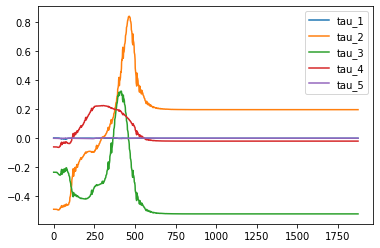

In [66]:
x_range = range(0, len(tau_setpoint_array))
#x_range = solution.t
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_range, [x[0] for x in tau_setpoint_array],label="tau_1")
ax.plot(x_range, [x[1] for x in tau_setpoint_array],label="tau_2")
ax.plot(x_range, [x[2] for x in tau_setpoint_array],label="tau_3")
ax.plot(x_range, [x[3] for x in tau_setpoint_array],label="tau_4")
ax.plot(x_range, [x[4] for x in tau_setpoint_array],label="tau_5")
plt.legend()

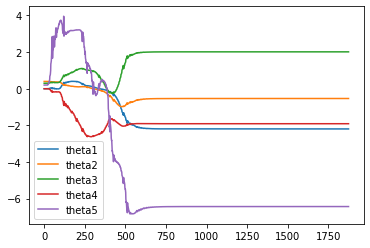

In [67]:
x_range = range(0, len(q_array))
#x_range = solution.t
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_range, [x[0] for x in q_array],label="theta1")
ax.plot(x_range, [x[1] for x in q_array],label="theta2")
ax.plot(x_range, [x[2] for x in q_array],label="theta3")
ax.plot(x_range, [x[3] for x in q_array],label="theta4")
ax.plot(x_range, [x[4] for x in q_array],label="theta5")
plt.legend()

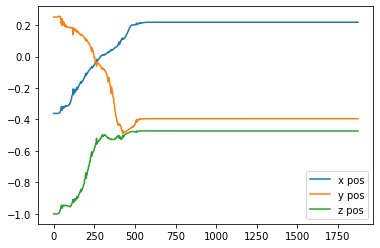

In [68]:
x_range = range(0, len(p_array))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_range, [x[0] for x in p_array],label="x pos")
ax.plot(x_range, [x[1] for x in p_array],label="y pos")
ax.plot(x_range, [x[2] for x in p_array],label="z pos")
plt.legend()

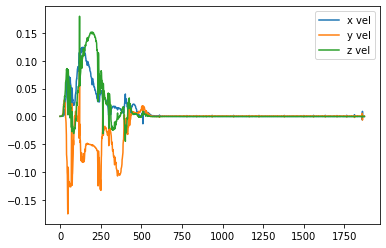

In [69]:
x_range = range(0, len(v_array))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x_range, [x[0] for x in v_array],label="x vel")
ax.plot(x_range, [x[1] for x in v_array],label="y vel")
ax.plot(x_range, [x[2] for x in v_array],label="z vel")
plt.legend()

In [70]:
eig_counter = 0

for i in range(len(B_array)):
    values, vectors = np.linalg.eig(B_array[i])
    #print(values)
    if any([x < 0 for x in values]) == True:
        #print("Eigenvalue is negative.")
        eig_counter += 1
        #print(B_array[i])
        
print(eig_counter, "negative eigenvalues found.")

0 negative eigenvalues found.
